<a href="https://colab.research.google.com/github/Chayansp/MyProject/blob/main/SalesAnalysisandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Sales Data


In [1]:
# import data
import pandas as pd
df = pd.read_csv("sample-store.csv")

In [2]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# shape of dataframe
df.shape

(9994, 21)

In [4]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [5]:
#rename column name to without sapce and lower case
cols = df.columns
new_column = [col.lower().replace(' ','_').replace('-','_') for col in cols]
df.columns = new_column
print(df.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country/region', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')



We can use pd.to_datetime() function to convert columns 'Order Date' and 'Ship Date' to datetime.

In [6]:
# example of pd.to_datetime() function
pd.to_datetime(df['order_date'].head(), format='%m/%d/%Y')

0   2019-11-08
1   2019-11-08
2   2019-06-12
3   2018-10-11
4   2018-10-11
Name: order_date, dtype: datetime64[ns]

In [7]:
# TODO - convert order date and ship date to datetime in the original dataframe
df['order_date'] = pd.to_datetime(df['order_date'],format='%m/%d/%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'],format='%m/%d/%Y')

In [8]:
# TODO - count nan in postal code column
df['postal_code'].isna().sum()

11

In [9]:
# TODO - filter rows with missing values
df[df.isna().any(axis=1)]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country/region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


##Data Analysis Part


In [10]:
# how many columns, rows in this dataset
print(f"Rows = {df.shape[0]}\
        \nColumns = {df.shape[1]}")

Rows = 9994        
Columns = 21


In [11]:
# is there any missing values?, if there is, which colunm? how many nan values?
print(f"Are there any missing values? : {df.isna().any().any()}\
        \nWhich column? : {list(df.columns[df.isna().any()])}\
        \nhow many nan values? : {df.postal_code.isna().sum()}")

Are there any missing values? : True        
Which column? : ['postal_code']        
how many nan values? : 11


In [12]:
# your friend ask for `California` data, filter it and export csv for him
california_data = df[df['state'] == "California"]
california_data.to_csv("california_data.csv")

In [13]:
# your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file
CA_TX_data = df[(df['state'].isin(['California','Texas'])) & (df['order_date'].dt.year == 2017)]
CA_TX_data.to_csv("CA_TX_data.csv")

In [14]:
# how much total sales, average sales, and standard deviation of sales your company make in 2017
df_2017 = df[df.order_date.dt.year == 2017]
print(df_2017['sales'].agg(['sum','mean','std']))

#print(df[df.order_date.dt.year == 2017]['sales'].agg(['sum','mean','std']))

sum     484247.498100
mean       242.974159
std        754.053357
Name: sales, dtype: float64


In [15]:
# which Segment has the highest profit in 2018
df_2018 = df[df.order_date.dt.year == 2018]
max_profit_2018 = df.groupby('segment').profit.sum().sort_values(ascending=False).head(1)

print('max_profit_2018')
print("the segment had highest profit was {}".format(max_profit_2018.index.values[0]))

max_profit_2018
the segment had highest profit was Consumer


In [16]:
# which top 5 States have the least total sales between 15 April 2019 - 31 December 2019
start_date = '2019/04/15'
end_date = '2019/12/31'

duration = df[(df['order_date']>start_date)&(df['order_date']> end_date)]

result = duration.groupby('state')['sales'].sum().sort_values().head(5)
print(result)
print(f"\n 5 states had the least total sales during 15 April - 31 December in 2019 were\n{list(result.index)}")

state
District of Columbia     77.76
Iowa                    716.41
Kansas                  733.15
Vermont                 842.21
North Dakota            919.91
Name: sales, dtype: float64

 5 states had the least total sales during 15 April - 31 December in 2019 were
['District of Columbia', 'Iowa', 'Kansas', 'Vermont', 'North Dakota']


In [17]:
# what is the proportion of total sales (%) in West + Central in 2019 e.g. 25%
df_2019 = df[df['order_date'].dt.year==2019]

sales_region_2019 =  df_2019.groupby('region')['sales'].sum().reset_index()
sales_region_2019['proportion'] = round(sales_region_2019['sales'] / sales_region_2019['sales'].sum(),4)
prop_west_central = sales_region_2019.loc[sales_region_2019['region'].isin(['West','Central']), 'proportion'].sum()
print('The proportion of total sales in West and Central = ',prop_west_central*100 ,'%')


The proportion of total sales in West and Central =  54.97 %


In [18]:
# find top 10 popular products in terms of number of orders vs. total sales during 2019-2020
df_2019_2020 = df[df['order_date'].dt.year.isin([2019,2020])]


product_sales = df_2019_2020.groupby('product_name')['sales'].agg(['count','sum']).reset_index()\
                                  .rename(columns={'count':'total_order', 'sum':'total_sales'})
product_sales = product_sales.sort_values(by=['total_order', 'total_sales'], ascending=False)

top_10_popular_products = product_sales.head(10)
print(top_10_popular_products)

                                         product_name  total_order  \
512                                 Easy-staple paper           27   
1412                                          Staples           24   
1406                                  Staple envelope           22   
1413                          Staples in misc. colors           13   
411                Chromcraft Round Conference Tables           12   
1409                                   Staple remover           12   
1421                          Storex Dura Pro Binders           12   
732   Global Wood Trimmed Manager's Task Chair, Khaki           11   
250                           Avery Non-Stick Binders           11   
1416             Sterilite Officeware Hinged File Box           10   

      total_sales  
512      1481.728  
1412      462.068  
1406      644.936  
1413      357.164  
411      7965.053  
1409      204.512  
1421      176.418  
732      2793.086  
250       122.128  
1416      314.400  


In [51]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


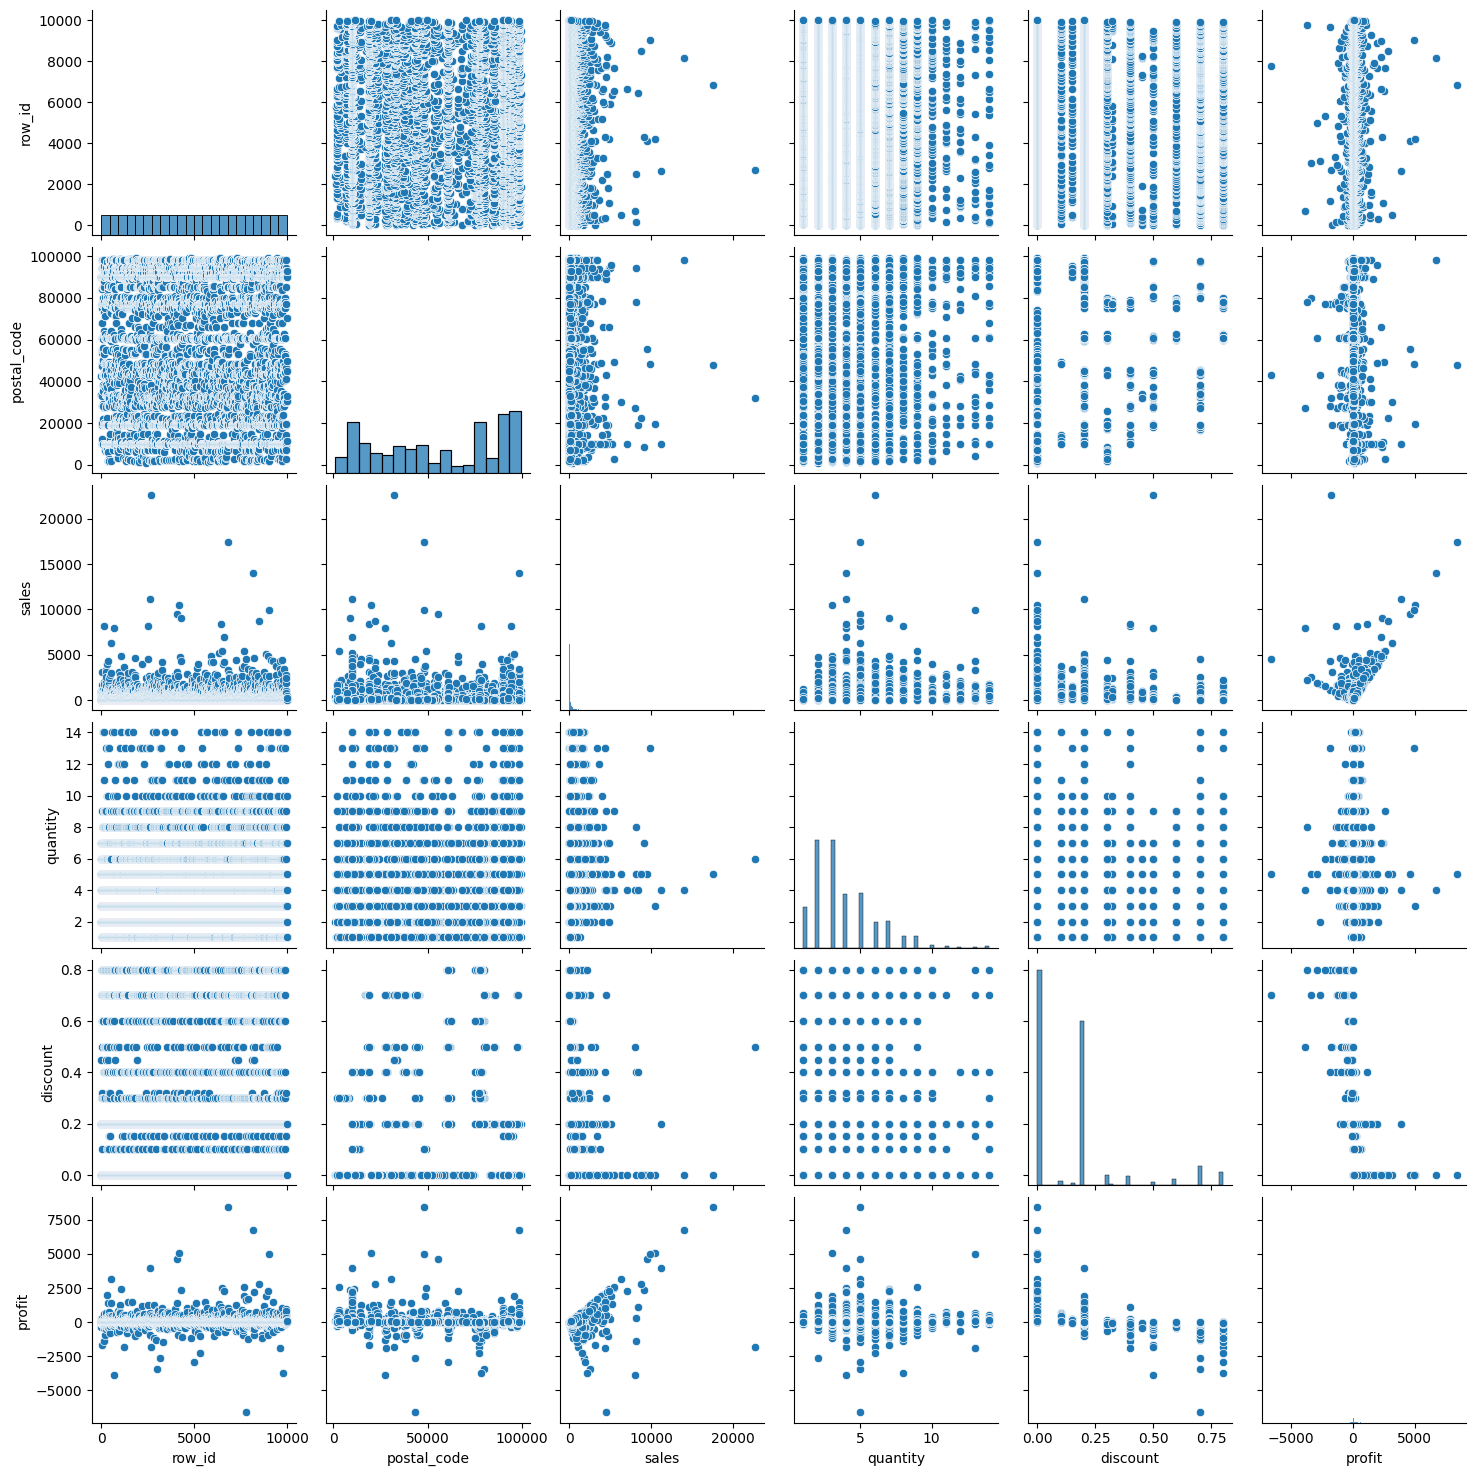

In [54]:
import seaborn as sns
sns.pairplot(df)

<ipython-input-53-9500cfff082c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'])


<Axes: xlabel='sales', ylabel='Density'>

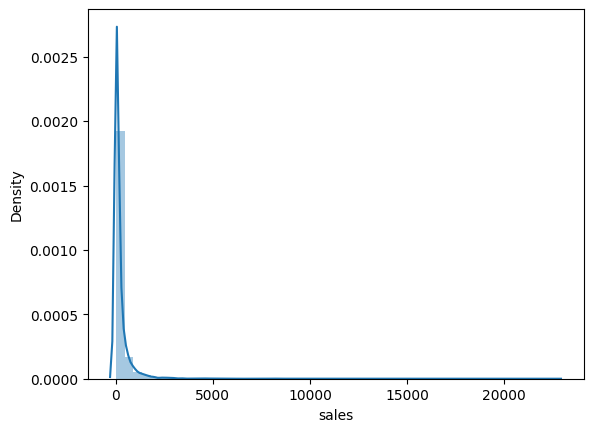

In [53]:
sns.distplot(df['sales'])

#Linear Regression

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Prepare the data
X = df[['quantity', 'discount','profit']]
y = df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [46]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Optionally, you can inspect the coefficients to understand the importance of each feature
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Absolute Error: 245.0755698445027
    Feature  Coefficient
0  quantity    41.550264
1  discount   249.571780
2    profit     1.561674


In [47]:
print(model.intercept_)

-18.097131357551177


In [50]:
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

R-squared: -0.15181720106063934


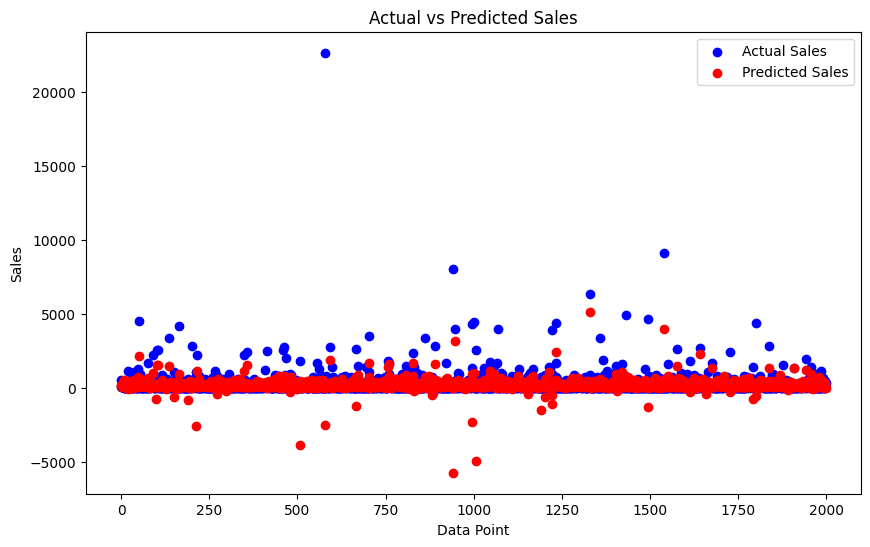

In [48]:
import matplotlib.pyplot as plt

# y_test contains the actual sales values and predictions contains the model's predictions
plt.figure(figsize=(10, 6))

# Plotting the actual sales values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sales')

# Plotting the predicted sales values
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Sales')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.legend()
plt.show()